# Automatic Feature Selection

In many cases we spend a good deal of time on *feature engineering* - the process of adding features to our model data.  But how do we know that the feature is helpful?  How can we be sure it is adding to the signal we are trying to measure and not just added noise.

Adding more features to a model will make the model more complex and this will increase the likelyhood that the model will overfit the data.

When you are confronted with a model with a large number of features, it is a good idea to ascertain if the feature is important, and if not, drop the feature.

There are 3 ways to determine if a feature is important:

#### Univariate Statistics

#### Model-Based Solutions

#### Iterative Selection

All of these methods are supervised methods - meaning they need the target for fitting the model.  The data set to test whether the feature is important will be split into a training and test set, and a determination as to whether the feature is important will be made.

<hr>
## Univariate Statistics - (ANOVA) analysis of variance

Univariate statistics approach looks at each feature individually, not their interactions or cummulative impact, and will compute whether there is a staticially significant relationship between the feature in question and the target value.

The features with the highest confidence are selected to keep in the model, and the others are dropped.

This method is usually fast to execute, because we are not building a model - but just looking for a relationship.  It is even independent of the model that will ultimately be executed.

In **scikit-learn** you choose either the *f_classif* test for classification, or *f_regression* for regression.  A *p-value* is calculated, and if the *p-value* exceeds a threshold as determined by either using *SelectKBest* (select the best 'k' number of features) or *SelectPercentile* (select a fixed percentage of best features)

Below is an example taken from the book:
### Introduction to Machine Learning with Python: A Guide for Data Scientists
- Book by Andreas Muller and Sarah Guido is a very consumeable guide to machine learning with great insight into the field.

- You can find that on [Amazon](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_2?ie=UTF8&qid=1511371961&sr=8-2&keywords=machine+learning+oreilly).

- Andreas [GitHub](https://github.com/amueller/introduction_to_ml_with_python) material for the book.

Using the *scikit-learn* cancer dataset with some random noise added to the features.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFpr
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import f_classif 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

In [3]:
#get a deterministic set of random numbers - which seems like an oxymoron, 
# but to keep the results consistent - add a seed
rng = np.random.RandomState(42)
# create a random normal distribution centered at zero, with a standard deviation of 1
# with an output shape of len(cancer.data) number of rows, and 50 columns
noise = rng.normal(loc=0.0, scale=1.0,size=(len(cancer.data), 50))

Lets look at the shape of the Cancer dataset, and the shape of the noise we are adding.

Notice that the both have the same number of rows, and the cancer dataset has 30 features, and the noise has 50 columns of random values.

After we add the noise to the dataset, we can then apply the techniques of automatic feature selection to see if we can eliminate the noise.

In [4]:
print(cancer.data.shape)
print(noise.shape)

(569, 30)
(569, 50)


In [5]:
# Add noise to the features
# first 30 are features from the dataset, the next 50 are noise
X_with_noise = np.hstack([cancer.data, noise])
print(X_with_noise.shape)

(569, 80)


Split the data, via *train_test_split* and then apply the Univariate Statistics from scikit-learn.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_with_noise, cancer.target, random_state=0, test_size=0.5)

### f_classif and SelectPercentile to select 50% of the features

The f_classif if the default test, but we are going to be explict.

Also notice, that we are **NOT** creating a model, but using classes from the feature_selection package to fit and transform the training data.

In [7]:
select_percentile = SelectPercentile(score_func=f_classif, percentile=50)
select_percentile.fit(X_train, y_train)

# transform the training set
X_train_select_percentile = select_percentile.transform(X_train)

In [8]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_select_percentile.shape: {X_train_select_percentile.shape}")

X_train.shape: (284, 80)
X_train_select_percentile.shape: (284, 40)


As you can see, the number of features was reduced by 50%

*SelectPercentile* has a method **get_support** which will return a boolean mask of all of the features selected. We can use this to get a visual representation of the features that have been selected.


([], <a list of 0 Text yticklabel objects>)

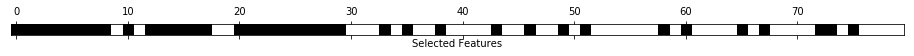

In [9]:
mask = select_percentile.get_support()

#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r') # reshape, 1 row all of the columns
plt.xlabel('Selected Features')
plt.yticks(())

From above you can see that some of the features selected, were actually in the noise - and randomly showed a more staticially significant relationship than the original features did.

### f_classif and SelectKBest 40 features

X_train.shape: (284, 80)
X_train_select_kbest.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

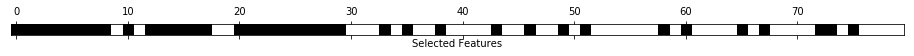

In [10]:
select_kbest = SelectKBest(score_func=f_classif, k=40)
select_kbest.fit(X_train, y_train)

# transform the training set
X_train_select_kbest = select_kbest.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_select_kbest.shape: {X_train_select_kbest.shape}")
mask = select_kbest.get_support()

#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r') # reshape, 1 row all of the columns
plt.xlabel('Selected Features')
plt.yticks(())

As you would expect, it is exactly the same since we used the same scoring function.

### f_classif and SelectFpr

This selector will attempt to False Positive Rate

Filter: Select the pvalues below alpha based on a FPR test.

FPR test stands for False Positive Rate test. It controls the total amount of false detections.

X_train.shape: (284, 80)
X_train_select_fpr.shape: (284, 32)


([], <a list of 0 Text yticklabel objects>)

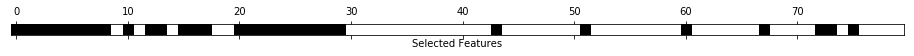

In [11]:
select_fpr = SelectFpr(score_func=f_classif, alpha=0.05)
select_fpr.fit(X_train, y_train)

# transform the training set
X_train_select_fpr = select_fpr.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_select_fpr.shape: {X_train_select_fpr.shape}")
mask = select_fpr.get_support()

#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r') # reshape, 1 row all of the columns
plt.xlabel('Selected Features')
plt.yticks(())

From above, you can see that this feature selection method selected a different set of features.

Which set of features produces the better model.

Using LogisticRegression on the various X_train_select values so we can get a sense for how feature selection impacts the accuracy.

In [12]:
from sklearn.linear_model import LogisticRegression

# transform test data, because we have to apply the same transformation to the training and the test data
X_test_select_kbest = select_kbest.transform(X_test)
X_test_select_fpr = select_fpr.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)

lr.fit(X_train_select_kbest, y_train)
score_kbest = lr.score(X_test_select_kbest, y_test)

lr.fit(X_train_select_fpr, y_train)
score_fpr = lr.score(X_test_select_fpr, y_test)

print(f"Score with all Features: {score}")
print(f"Score with KBest Features: {score_kbest}")
print(f"Score with Fpr Features: {score_fpr}")


Score with all Features: 0.9298245614035088
Score with KBest Features: 0.9403508771929825
Score with Fpr Features: 0.9438596491228071


### Univariate Statistics Summary

Reviewing the model results above, you can see that the removing features that are not statistically significant to the target, will increase the accurracy score.  This technique is computationally efficient, but it only considers individual features and not the interaction between features.


<hr>
## Model-Based Feature Selection

Where the Univariate Statistics feature selection is a relatively efficient way to handle feature selection, it only looks at features individually.  Model based features selection uses a supervised machine learning model to judge the importance of a feature.  This has the benefit of considering all of the features collectively.

The model used for feature selection does not have to be the same model used used for the final supervised model for the problem.

The model does however, need to provide a measure of the importance of each feature.  Decision trees provide a feature_importances_ attribute which encodes the importance of each feature.  Linear models have coefficients which can capture feature importances by considering the absolute value of the coefficients.

To use model based feature selection you must use the ***SelectFromModel*** transformer.

The **SelectFromModel** class selects all features that have an importance measure of the feature greater than the provided threshold.  

This is a much more powerful way to perform feature selection, but depending upon your data - it might also be an expensive way as well.

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Create the SelectFromModel
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [15]:
# fit and transform the selector on the train
selector.fit(X_train, y_train)
X_train_l1 = selector.transform(X_train)

X_train.shape: (284, 80)
X_train_select_fpr.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

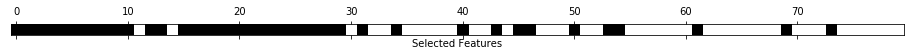

In [16]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_select_fpr.shape: {X_train_l1.shape}")
mask = selector.get_support()

#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r') # reshape, 1 row all of the columns
plt.xlabel('Selected Features')
plt.yticks(())

You can see from the plot that all but two of the original features were selected, but there were some of the random noise features selected.  

Lets calculate the performance of this feature selection

In [17]:
X_test_l1 = selector.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f"RandomForestClassifier Selector Score: {score} ")

RandomForestClassifier Selector Score: 0.9508771929824561 


With slightly better feature selection, we were also able to obtain slightly better performance.

<hr>
## Iterative Feature Selection

The model based feature technique creates a single model to measure the significant of the features.  The Iterative Feature Selection technique creates a series of models with varying numbers of features.

There are two basic methods:

- Start with no features and add features one by one until a stopping criteria is met.
- Start with all features and remove features one by one until a stopping criteria is met.

Because a series of models are built, this method is the most expensive than the other methods, but in theory it does a much better job of validating the feature importance and in particular when there are dependencies between the features.

On particular method is, *recursive feature elimination* (RFE), which starts with all features, builds a model, and discards the least important features according to the model.  Then a new model is built, using the remaining features, discards the least important features, etc until the prespecified number of features are left.

The model used, like above, must have a way to determine feature importance.

Again, for this example we will use the Random Forest.


In [18]:
from sklearn.feature_selection import RFE
select_rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

In [19]:
select_rfe.fit(X_train, y_train)
X_train_rfe = select_rfe.transform(X_train)
X_test_rfe = select_rfe.transform(X_test)

In [20]:
# create a model to determine the score
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Recursive Feature Elimination - RandomForestClassifier Selector Score: {score} ")

Recursive Feature Elimination - RandomForestClassifier Selector Score: 0.9508771929824561 


([], <a list of 0 Text yticklabel objects>)

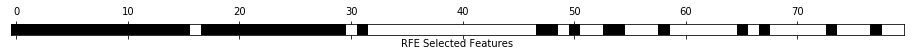

In [21]:
mask = select_rfe.get_support()

#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r') # reshape, 1 row all of the columns
plt.xlabel('RFE Selected Features')
plt.yticks(())

As you can see, this method picked all but one of the features.  This method did a much better job of feature selection, but it also took significantly longer.

We can also use the model inside *RFE* to make predictions with the features that it selected off of the original test data:


In [22]:
score2 = select_rfe.score(X_test, y_test)
print(f"RFE on Test data score: {score2}")

RFE on Test data score: 0.9508771929824561
